In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load cleaned data
temp_df = pd.read_csv('../data/processed/temperature_clean.csv')

print(f"Loaded {len(temp_df):,} temperature records")
print(f"Period: {temp_df['year'].min()}-{temp_df['year'].max()}")

Loaded 29,700 temperature records
Period: 1990-2022


In [2]:
# Filter to Annual Average temperatures only
temp_annual = temp_df[
    (temp_df['season'] == 'Annual') & 
    (temp_df['statistic'] == 'Average')
].copy()

print(f"Annual average records: {len(temp_annual):,}")
print(f"\nSites available:")
print(temp_annual['site'].unique())

Annual average records: 1,980

Sites available:
['Auckland (Auckland)' 'Blenheim (Marlborough)'
 'Christchurch (Canterbury)' 'Dannevirke (Manawatū-Whanganui)'
 'Dunedin (Otago)' 'Gisborne (Gisborne)' 'Gore (Southland)'
 'Hamilton (Waikato)' 'Hokitika (West Coast)' 'Invercargill (Southland)'
 'Kerikeri (Northland)' 'Lake Tekapo (Canterbury)'
 'Masterton (Wellington)' 'Milford Sound (Southland)'
 "Napier (Hawke's Bay)" 'Nelson (Nelson)' 'New Plymouth (Taranaki)'
 'Queenstown (Otago)' 'Reefton (West Coast)' 'Rotorua (Bay of Plenty)'
 'Tara Hills (Canterbury)' 'Taumarunui (Manawatū-Whanganui)'
 'Taupō (Waikato)' 'Tauranga (Bay of Plenty)' 'Timaru (Canterbury)'
 'Waiouru (Manawatū-Whanganui)' 'Wellington (Wellington)'
 'Whanganui (Manawatū-Whanganui)' 'Whangaparāoa (Auckland)'
 'Whangārei (Northland)']


In [4]:
# Calculate temperature change for each site (1990 vs 2022)
temp_change = []

for site in temp_annual['site'].unique():
    site_data = temp_annual[temp_annual['site'] == site].sort_values('year')
    
    if len(site_data) >= 30:  # Ensure enough data
        temp_1990s = site_data[site_data['year'] <= 1995]['temperature'].mean()
        temp_2020s = site_data[site_data['year'] >= 2017]['temperature'].mean()
        
        change = temp_2020s - temp_1990s
        
        temp_change.append({
            'site': site,
            'temp_1990s': temp_1990s,
            'temp_2020s': temp_2020s,
            'change': change
        })

change_df = pd.DataFrame(temp_change).sort_values('change', ascending=False)

print(" TOP 5 SITES WITH MOST WARMING:")
print(change_df.head())
print("\nSITES WITH LEAST WARMING:")
print(change_df.tail())

 TOP 5 SITES WITH MOST WARMING:
                               site  temp_1990s  temp_2020s    change
23         Tauranga (Bay of Plenty)   14.393056   15.944444  1.551389
3   Dannevirke (Manawatū-Whanganui)   11.677778   13.229167  1.551389
13        Milford Sound (Southland)    9.863889   11.263889  1.400000
15                  Nelson (Nelson)   12.388889   13.719444  1.330556
25     Waiouru (Manawatū-Whanganui)    8.781944   10.112500  1.330556

SITES WITH LEAST WARMING:
                              site  temp_1990s  temp_2020s    change
4                  Dunedin (Otago)   10.980556   11.926389  0.945833
27  Whanganui (Manawatū-Whanganui)   13.752778   14.688889  0.936111
20         Tara Hills (Canterbury)    9.173611   10.051389  0.877778
2        Christchurch (Canterbury)   11.387500   12.205556  0.818056
24             Timaru (Canterbury)   10.261111   11.034722  0.773611


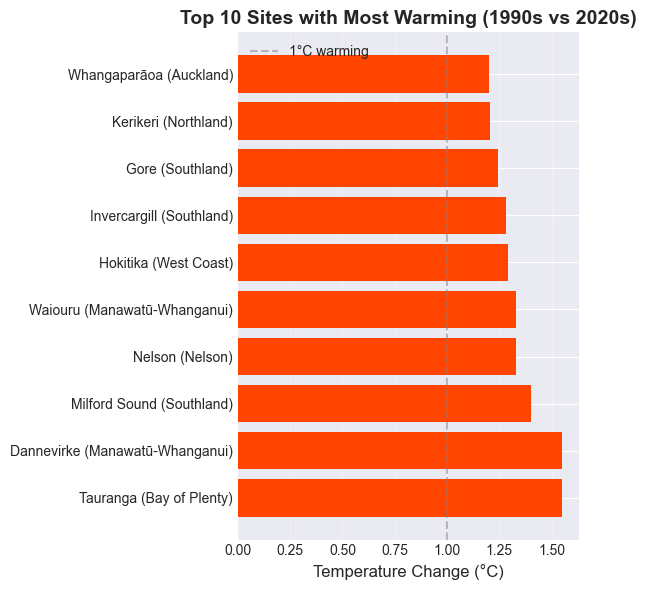

✅ Chart saved to outputs/figures/


In [ ]:
# Plot top 10 warming sites
plt.figure(figsize=(6, 6))

top_10 = change_df.head(10)

plt.barh(range(len(top_10)), top_10['change'], color='orangered')
plt.yticks(range(len(top_10)), top_10['site'])
plt.xlabel('Temperature Change (°C)', fontsize=12)
plt.title('Top 10 Sites with Most Warming (1990s vs 2020s)', fontsize=14, fontweight='bold')
plt.axvline(x=1.0, color='gray', linestyle='--', alpha=0.5, label='1°C warming')
plt.legend()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()

# Save figure
plt.savefig('../outputs/figures/top_warming_sites.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved to outputs/figures/")

In [12]:
# Recalculate with percentage change
temp_change_pct = []

for site in temp_annual['site'].unique():
    site_data = temp_annual[temp_annual['site'] == site].sort_values('year')
    
    if len(site_data) >= 30:
        temp_1990s = site_data[site_data['year'] <= 1995]['temperature'].mean()
        temp_2020s = site_data[site_data['year'] >= 2017]['temperature'].mean()
        
        change_abs = temp_2020s - temp_1990s
        change_pct = (change_abs / temp_1990s) * 100  # Percentage change
        
        temp_change_pct.append({
            'site': site,
            'temp_1990s': temp_1990s,
            'temp_2020s': temp_2020s,
            'change_celsius': change_abs,
            'change_percent': change_pct
        })

change_pct_df = pd.DataFrame(temp_change_pct).sort_values('change_percent', ascending=False)

print("TOP 5 SITES WITH MOST WARMING (%):")
print(change_pct_df[['site', 'temp_1990s', 'change_celsius', 'change_percent']].head())
print("\n SITES WITH LEAST WARMING (%):")
print(change_pct_df[['site', 'temp_1990s', 'change_celsius', 'change_percent']].tail())

TOP 5 SITES WITH MOST WARMING (%):
                               site  temp_1990s  change_celsius  \
25     Waiouru (Manawatū-Whanganui)    8.781944        1.330556   
13        Milford Sound (Southland)    9.863889        1.400000   
9          Invercargill (Southland)    9.491667        1.283333   
3   Dannevirke (Manawatū-Whanganui)   11.677778        1.551389   
6                  Gore (Southland)    9.444444        1.244444   

    change_percent  
25       15.151036  
13       14.193185  
9        13.520632  
3        13.284967  
6        13.176471  

 SITES WITH LEAST WARMING (%):
                              site  temp_1990s  change_celsius  change_percent
5              Gisborne (Gisborne)   14.108333        1.072222        7.599921
24             Timaru (Canterbury)   10.261111        0.773611        7.539253
2        Christchurch (Canterbury)   11.387500        0.818056        7.183803
27  Whanganui (Manawatū-Whanganui)   13.752778        0.936111        6.806706
0        

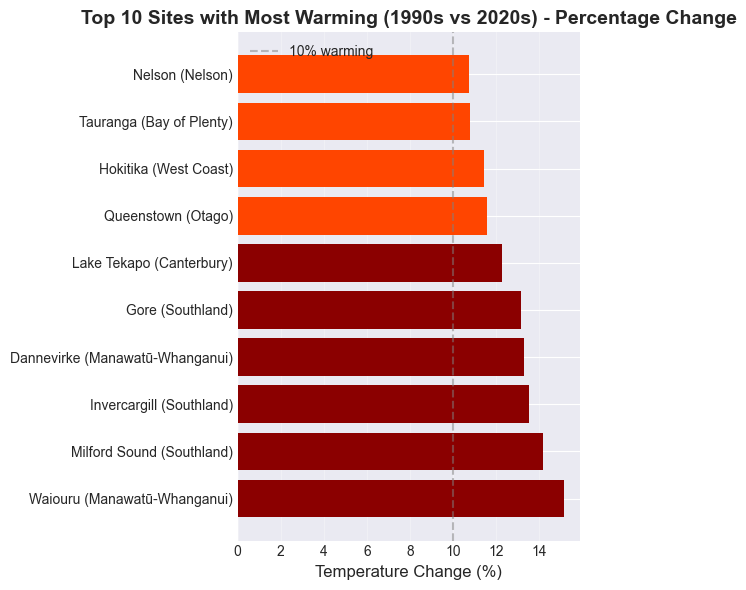

Chart saved


In [10]:
# Plot top 10 warming sites by percentage
plt.figure(figsize=(6, 6))

top_10_pct = change_pct_df.head(10)

colors = ['darkred' if x > 12 else 'orangered' for x in top_10_pct['change_percent']]
plt.barh(range(len(top_10_pct)), top_10_pct['change_percent'], color=colors)
plt.yticks(range(len(top_10_pct)), top_10_pct['site'])
plt.xlabel('Temperature Change (%)', fontsize=12)
plt.title('Top 10 Sites with Most Warming (1990s vs 2020s) - Percentage Change', 
          fontsize=14, fontweight='bold')
plt.axvline(x=10, color='gray', linestyle='--', alpha=0.5, label='10% warming')
plt.legend()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()

plt.savefig('../outputs/figures/top_warming_sites_percent.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved")

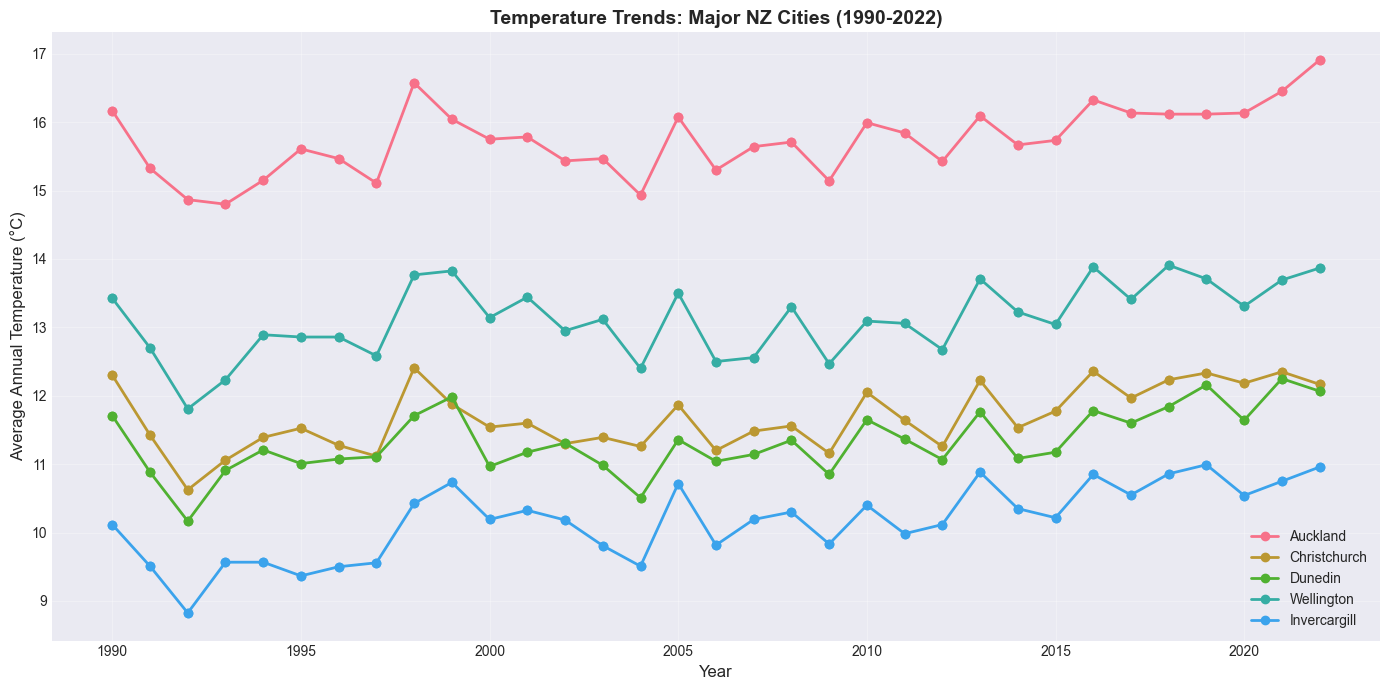

Time series chart saved


In [13]:
# Select key regions for comparison
key_sites = [
    'Auckland (Auckland)',
    'Christchurch (Canterbury)', 
    'Dunedin (Otago)',
    'Wellington (Wellington)',
    'Invercargill (Southland)'
]

# Filter data
key_data = temp_annual[temp_annual['site'].isin(key_sites)]

# Plot
plt.figure(figsize=(14, 7))

for site in key_sites:
    site_data = key_data[key_data['site'] == site].sort_values('year')
    plt.plot(site_data['year'], site_data['temperature'], 
             marker='o', linewidth=2, label=site.split(' (')[0])

plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Annual Temperature (°C)', fontsize=12)
plt.title('Temperature Trends: Major NZ Cities (1990-2022)', fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.savefig('../outputs/figures/temp_trends_major_cities.png', dpi=300, bbox_inches='tight')
plt.show()

print("Time series chart saved")